<div style="text-align: left;"><img src="https://www.juliabox.org/assets/img/juliacloudlogo.png" style="margin: 0px 0px 0px 0px; padding-right: 20px;width: 80px; float: left;" title="" alt="" /></div>
<img src="http://dmkpress.com/images/cms/thumbs/a5b0aeaa3fa7d6e58d75710c18673bd7ec6d5f6d/978-5-97060-370-3_270_369__100.jpg" style="margin: 0px 0px 5px 20px; width: 100px; float: right;" title="" alt="" />
Всестороннее введение в новый язык программирования для научно-технических вычислений [Julia](http://julialang.org/) в книге Малколма Шеррингтона, Packt Publishing, июль 2015.

<h1>Осваиваем язык Julia</h1><br />

Совершенствование мастерства в области аналитики и программирования при помощи Julia в целях решения задач комплексной обработки данных
<div style="text-align: left;font-size:8pt;padding-top:10px;">Программный код Julia (v0.4.5) протестирован в Windows 8.1/10 и Linux/Lubuntu 16.4</div>
<div style="text-align: left;"><h1>Глава 5. Работа с данными</h1></div>

# Базовая система ввода-вывода
## Терминальный ввод-вывод

In [1]:
write(STDOUT, "Help ME!!!\n")
# Help Me!!!
# 11

Help ME!!!


11

In [ ]:
read(STDIN,Char)    # => Ввод a + клавиша return (®) дает 'a'

In [ ]:
read(STDIN,Int32)   # => Ввод 1234® дает 875770417

In [ ]:
read(STDIN,Uint32)  # => Ввод 1234 ® дает 0x34333231

In [ ]:
a = readline()      # => Ввод 1234 ® дает a = "1234\n"

In [ ]:
function getInt()
  a = chomp(readline())
  try
    return int(a)
  catch
    return Nothing
  end
end

In [ ]:
readbytes(STDIN,4)
# abcd
# => 4-element Array{Uint8,1}: [0x61, 0x62, 0x63, 0x64]

## Дисковые файлы

In [1]:
function capitalize(f::IOStream)
  return uppercase(readall(f))
end

cd(joinpath(homedir(), "julia_projects","Alice"))

open(capitalize, "jabber4.txt")

"'TWAS BRILLIG, AND THE SLITHY TOVES\nDID GYRE AND GIMBLE IN THE WABE:\nALL MIMSY WERE THE BOROGOVES,\nAND THE MOME RATHS OUTGRABE.\n"

In [3]:
f = open("jabber4.txt")
  while (!eof(f))
    println(reverse(chomp(readline(f))))
  end
close(f)

sevot yhtils eht dna ,gillirb sawT'
:ebaw eht ni elbmig dna eryg diD
,sevogorob eht erew ysmim llA
.ebargtuo shtar emom eht dnA


In [4]:
open("jabber4.txt") do f
  while (!eof(f))
    println(reverse(chomp(readline(f))))
  end
end

sevot yhtils eht dna ,gillirb sawT'
:ebaw eht ni elbmig dna eryg diD
,sevogorob eht erew ysmim llA
.ebargtuo shtar emom eht dnA


## Обработка текста

In [1]:
function wordcount(text)
  wds = split(lowercase(text), [' ','\n','\t','-','.',',',':',';','!','?','\'','"']; keep = false)
  d = Dict()
  for w = wds
    d[w]=get(d,w,0)+1
  end
  return d
end

wordcount (generic function with 1 method)

In [2]:
# cd(getenv("HOME")*"julia_projects/Alice"); # только в Unix-подобных ОС

cd(joinpath(homedir(), "julia_projects","Alice"));  

open("jabber4.txt") do f
  c = wordcount(lowercase(readall(f)))
  print(c)
end

Dict{Any,Any}("gyre"=>1,"and"=>3,"brillig"=>1,"raths"=>1,"in"=>1,"mome"=>1,"toves"=>1,"mimsy"=>1,"twas"=>1,"did"=>1,"the"=>4,"borogoves"=>1,"were"=>1,"all"=>1,"wabe"=>1,"outgrabe"=>1,"slithy"=>1,"gimble"=>1)

In [8]:
function wordcount(dcnts,text)
  total = 0
  words = split(lowercase(text), [' ','\n','\t','-','.',',',':',';','!','?','\'','"','(',')']; keep=false)
  for w = words
    dcnts[w] = get(dcnts,w,0)+1
    total += 1
  end
  return total
end

wordcount (generic function with 2 methods)

In [9]:
d = Dict();
for fname in filter!(r"\.txt$", readdir())
  open(fname) do f
    n = wordcount(d, readall(f))
    @printf "%s: %d\n" fname n
  end
end

aged-aged-man.txt: 512
father-william.txt: 278
hunting-the-snark.txt: 4518
jabber4.txt: 23
jabberwocky.txt: 168
lobster-quadrille.txt: 231
mad-gardeners-song.txt: 348
voice-of-the-lobster.txt: 158
walrus-and-carpenter.txt: 623


In [10]:
wd = ["bellman", "boots", "gardener", "jabberwock", "snark"];
for w in wd
  @printf "%12s => %4d\n" w d[w]
end

     bellman =>   30
       boots =>    3
    gardener =>    2
  jabberwock =>    3
       snark =>   32


## Двоичные файлы

In [12]:
#
# netpbm.jl
#

cd(joinpath(homedir(), "julia_projects","images")); 

function pseudocolor(pix::UInt8)
  if pix <= 64
    pr = UInt8(0)
    pg = UInt8(0)
    pb = UInt8(4)*pix
  elseif pix <= 128
    pr = UInt8(0)
    pg = UInt8(4)*(pix-UInt8(64))
    pb = UInt8(255)
  elseif pix <= 192
    pr = UInt8(0)
    pg = UInt8(255)
    pb = UInt8(0)   #UInt8(4*(192 - pix))
  else
    pr = UInt8(4)*(pix - UInt8(192))
    pg = UInt8(0)   #UInt8(4*(256 - pix))
    pb = UInt8(0)
  end
  return (pr, pg, pb)
end

img = open("juliaset.pgm");
magic = chomp(readline(img));   # => "P5"

if magic == "P5"
 out = open("jsetcolor_jnb.ppm", "w");
    
 println(out, "P6");
 
 params = chomp(readline(img));  # => "800 400 255"
    
 println(out, params);
 
 (wd, ht, pmax) = [parse(UInt64,v) for v in split(params)]
 
 for i = 1:ht
    buf = readbytes(img, wd);
    for j = 1:wd
      (r,g,b) = pseudocolor(buf[j]);
      write(out,r); write(out,g); write(out,b);
    end
 end
 
 close(out);
 print("Готово.");
    
else
 error("Формат файла не является полутоновым NetPBM")
end

close(img);

Готово.

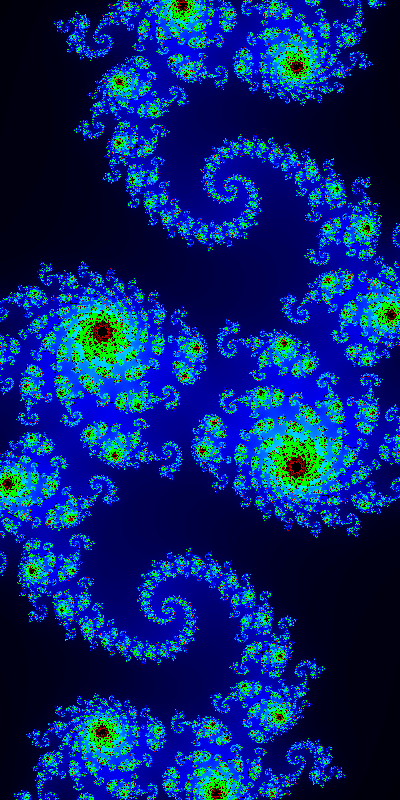

In [14]:
using Images

i = load("jsetcolor.png")
display(Image(i))